In this homework you will take the role of a researcher working on a database with the passengers of the Titanic ship which sunk. You are trying to understand what patterns there are in the passengers who survived, and you want to answer the question: what predicted that a passenger would survive?

Please come up with 3 hypothesis of what might predict that a passenger will survive, and show your work. It is ok if you find some things that do not predict at all, or that negatively predict that a passenger will survive. For each hypothesis, make explicit what your hypothesis or question is, make a plot that tries to answer that hypothesis, and explicitely describe your conclusion (i.e. was your hypothesis correct? what is the answer to your question?).

In [2]:
import seaborn as sns

In [3]:
titanic = sns.load_dataset("titanic")

In [4]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic["pclass"].nunique()

3

<Axes: xlabel='deck', ylabel='survived'>

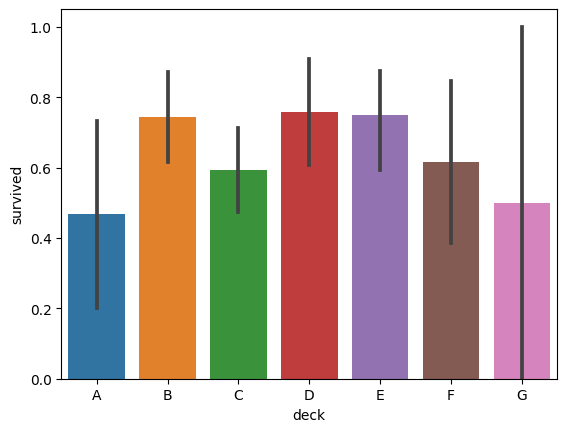

In [7]:
#Example hypothesis: maybe the people on the upper decks were more likely to survive! 
#(For reference, the decks are ordered in alphabetical order, so deck A was at the top, and G at the bottom of the ship).
sns.barplot(data=titanic, x = 'deck', y = "survived")

As we can see, it seems like there is not much of a correlation between the deck and the survival rate! (In case you are curious, the column "deck" is actually missing a lot of entries. You can confirm this by running::
 titanic.isna().sum()

 So, just in the case of using the deck, the database is not really reliable.)

In [ ]:
#Work on your hypothesis 1 here 
#check if the difference is sex related. Answer is yes! 

<Axes: xlabel='sex', ylabel='survived'>

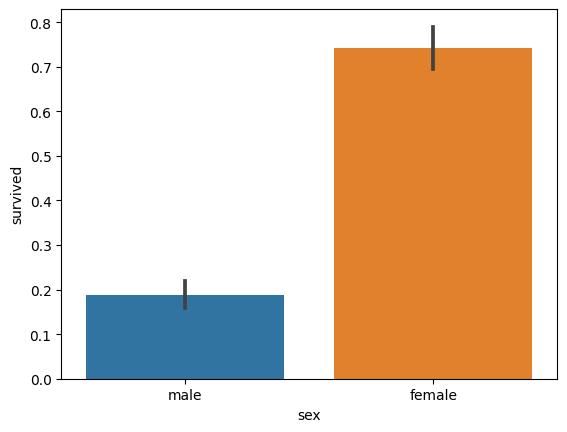

In [22]:
sns.barplot(data=titanic, x = 'sex', y = "survived")

<Axes: xlabel='who', ylabel='survived'>

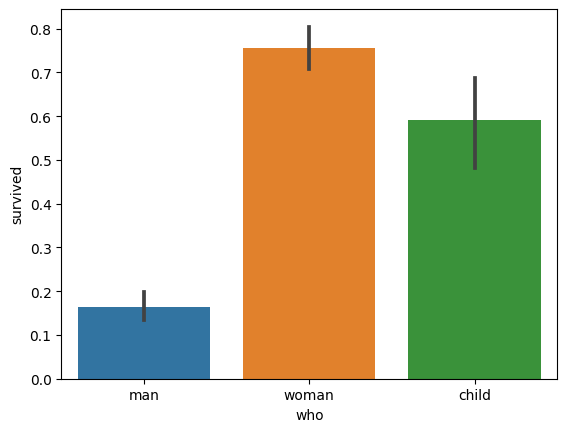

In [15]:
sns.barplot(data=titanic, x = 'who', y = "survived")

In [11]:
titanic_male = titanic.loc[(titanic["sex"] == "male")]
titanic_male

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
titanic_female = titanic.loc[(titanic["sex"] == "female")]
titanic_female

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


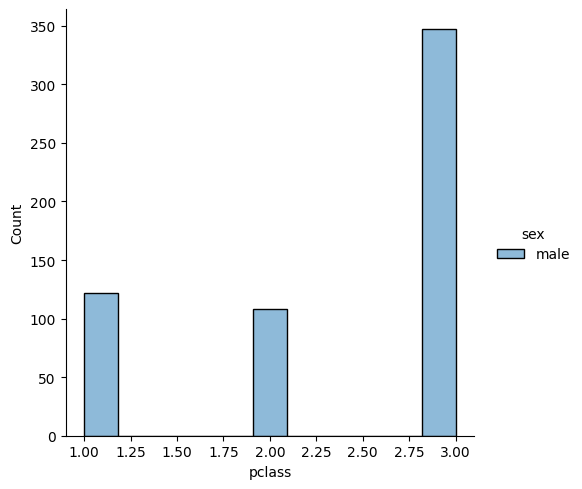

In [12]:
#Work on your hypothesis 2 here
sns.displot(data=titanic_male, x = 'pclass', hue='sex')

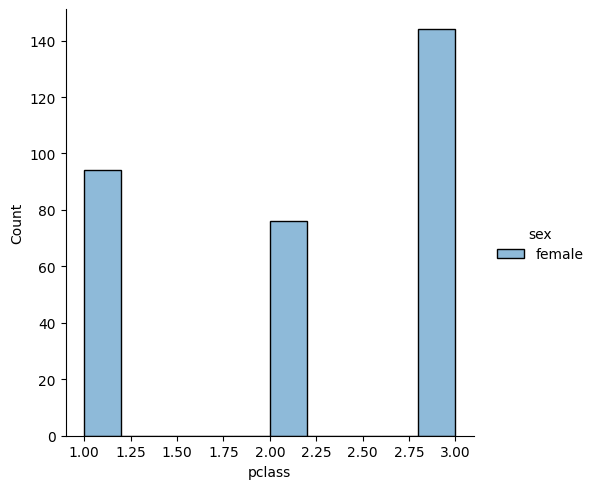

In [13]:
sns.displot(data=titanic_female, x = 'pclass', hue='sex')

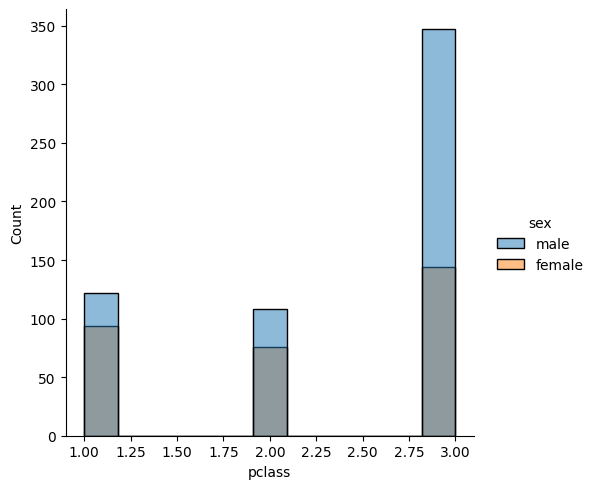

In [14]:
sns.displot(data=titanic, x = 'pclass', hue='sex')

<Axes: xlabel='pclass', ylabel='survived'>

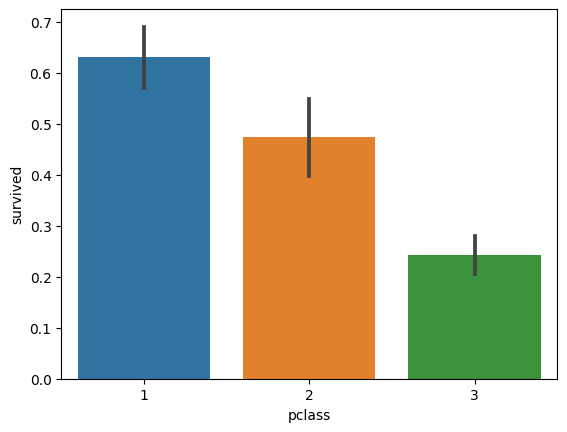

In [17]:
sns.barplot(data=titanic, x = 'pclass', y = "survived")

In [ ]:
titanic.groupby()

<Axes: xlabel='pclass', ylabel='survived'>

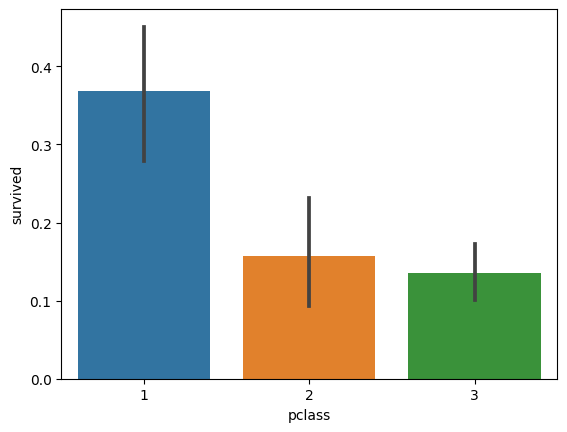

In [21]:
sns.barplot(data=titanic_male, x = 'pclass', y = "survived")

<Axes: xlabel='pclass', ylabel='survived'>

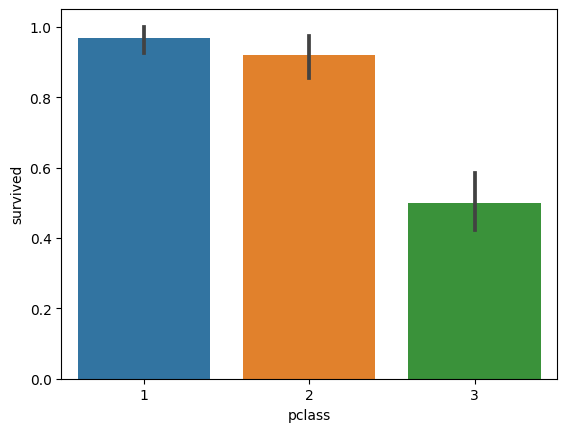

In [20]:
sns.barplot(data=titanic_female, x = 'pclass', y = "survived")

In [16]:
#Work on your hypothesis 3 here
sns.seaborn( titanic.corr()

AttributeError: ignored